In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%matplotlib inline

In [26]:
from sample_3d_view import sample_sphere, sample_torus, visualize_grid_sphere, visualize_grid_torus

In [27]:
from local_pca_utils import make_nearest_neighbors_graph, make_tangents, make_connection, make_2nd_order_laplacian

In [28]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import axes3d

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 24})

In [30]:
import itertools

from absl import logging

import numpy as np
import scipy
import scipy.sparse
import scipy.sparse.linalg

from tqdm import tqdm

In [31]:
npoints = 5000
latent_dim = 2

In [32]:
data_s2 = sample_sphere(npoints)
data_s2_2 = sample_sphere(npoints)
data_s2_3 = sample_sphere(npoints)


In [70]:
data_t = np.concatenate([data_s2, data_s2_2],axis=1)

In [71]:
#data_t = sample_torus(npoints,2,1)

In [72]:
data_t.shape

(5000, 6)

In [73]:
t_graph = make_nearest_neighbors_graph(data_t, 20, n=npoints)

100%|██████████| 5000/5000 [00:00<00:00, 7137.48it/s]


In [74]:
t_tangents = make_tangents(data_t, t_graph, 4)

100%|██████████| 5000/5000 [00:00<00:00, 14011.13it/s]


In [75]:
t_connection = make_connection(t_tangents, t_graph)

100%|██████████| 5000/5000 [00:02<00:00, 2065.34it/s]


In [76]:
t_2nd_order_laplacian = make_2nd_order_laplacian(t_connection, t_graph,sym=True, zero_trace=True)

100%|██████████| 5000/5000 [00:21<00:00, 230.34it/s]


In [77]:
t_2nd_order_laplacian

<45000x45000 sparse matrix of type '<class 'numpy.float32'>'
	with 9378342 stored elements (blocksize = 9x9) in Block Sparse Row format>

In [78]:
eigvals, eigvecs = scipy.sparse.linalg.eigsh(t_2nd_order_laplacian, k=10, which='SM')

In [79]:
eigvals

array([0.02531026, 1.1251041 , 1.1269314 , 1.1537786 , 1.1588492 ,
       1.1604947 , 1.1607473 , 1.1663194 , 1.1717206 , 1.1754383 ],
      dtype=float32)

In [80]:
x = [r"$\lambda_{1}$",r"$\lambda_{2}$",r"$\lambda_{3}$",r"$\lambda_{4}$",r"$\lambda_{5}$",r"$\lambda_{6}$",r"$\lambda_{7}$",r"$\lambda_{8}$",r"$\lambda_{9}$",r"$\lambda_{10}$"]

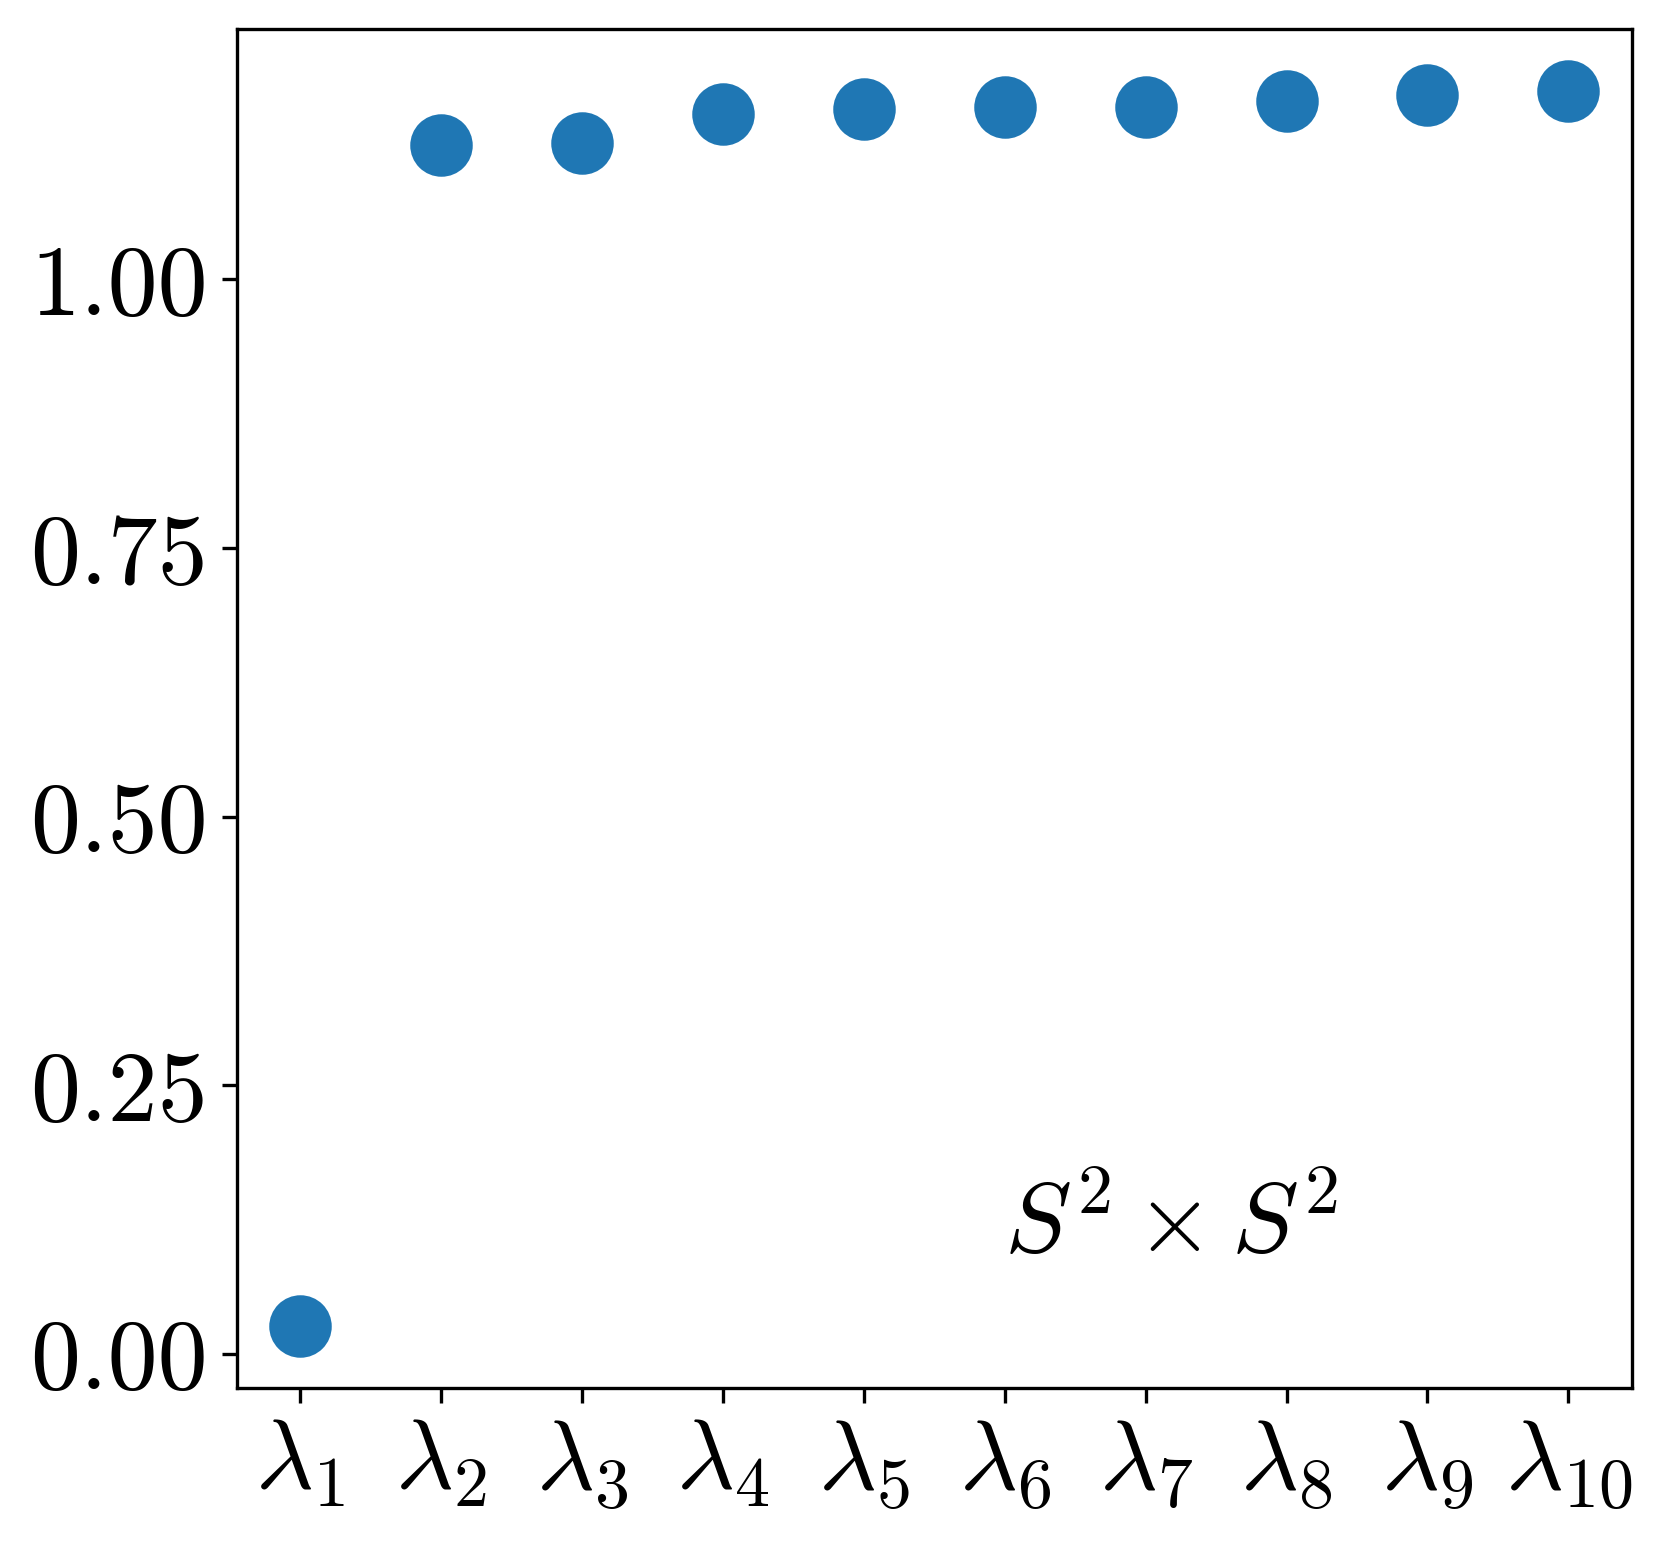

In [81]:
fig, ax = plt.subplots()
ax.plot(x, eigvals,marker='o',linestyle='None',markersize=14)
ax.text(0.55,0.1, r"$S^2 \times S^2$", transform=ax.transAxes)
fig.savefig(f'../figures/initial_3d_visualizations/eigvals_S2timesS2.png')    
fig.savefig(f'../figures/initial_3d_visualizations/eigvals_S2timesS2.pdf')

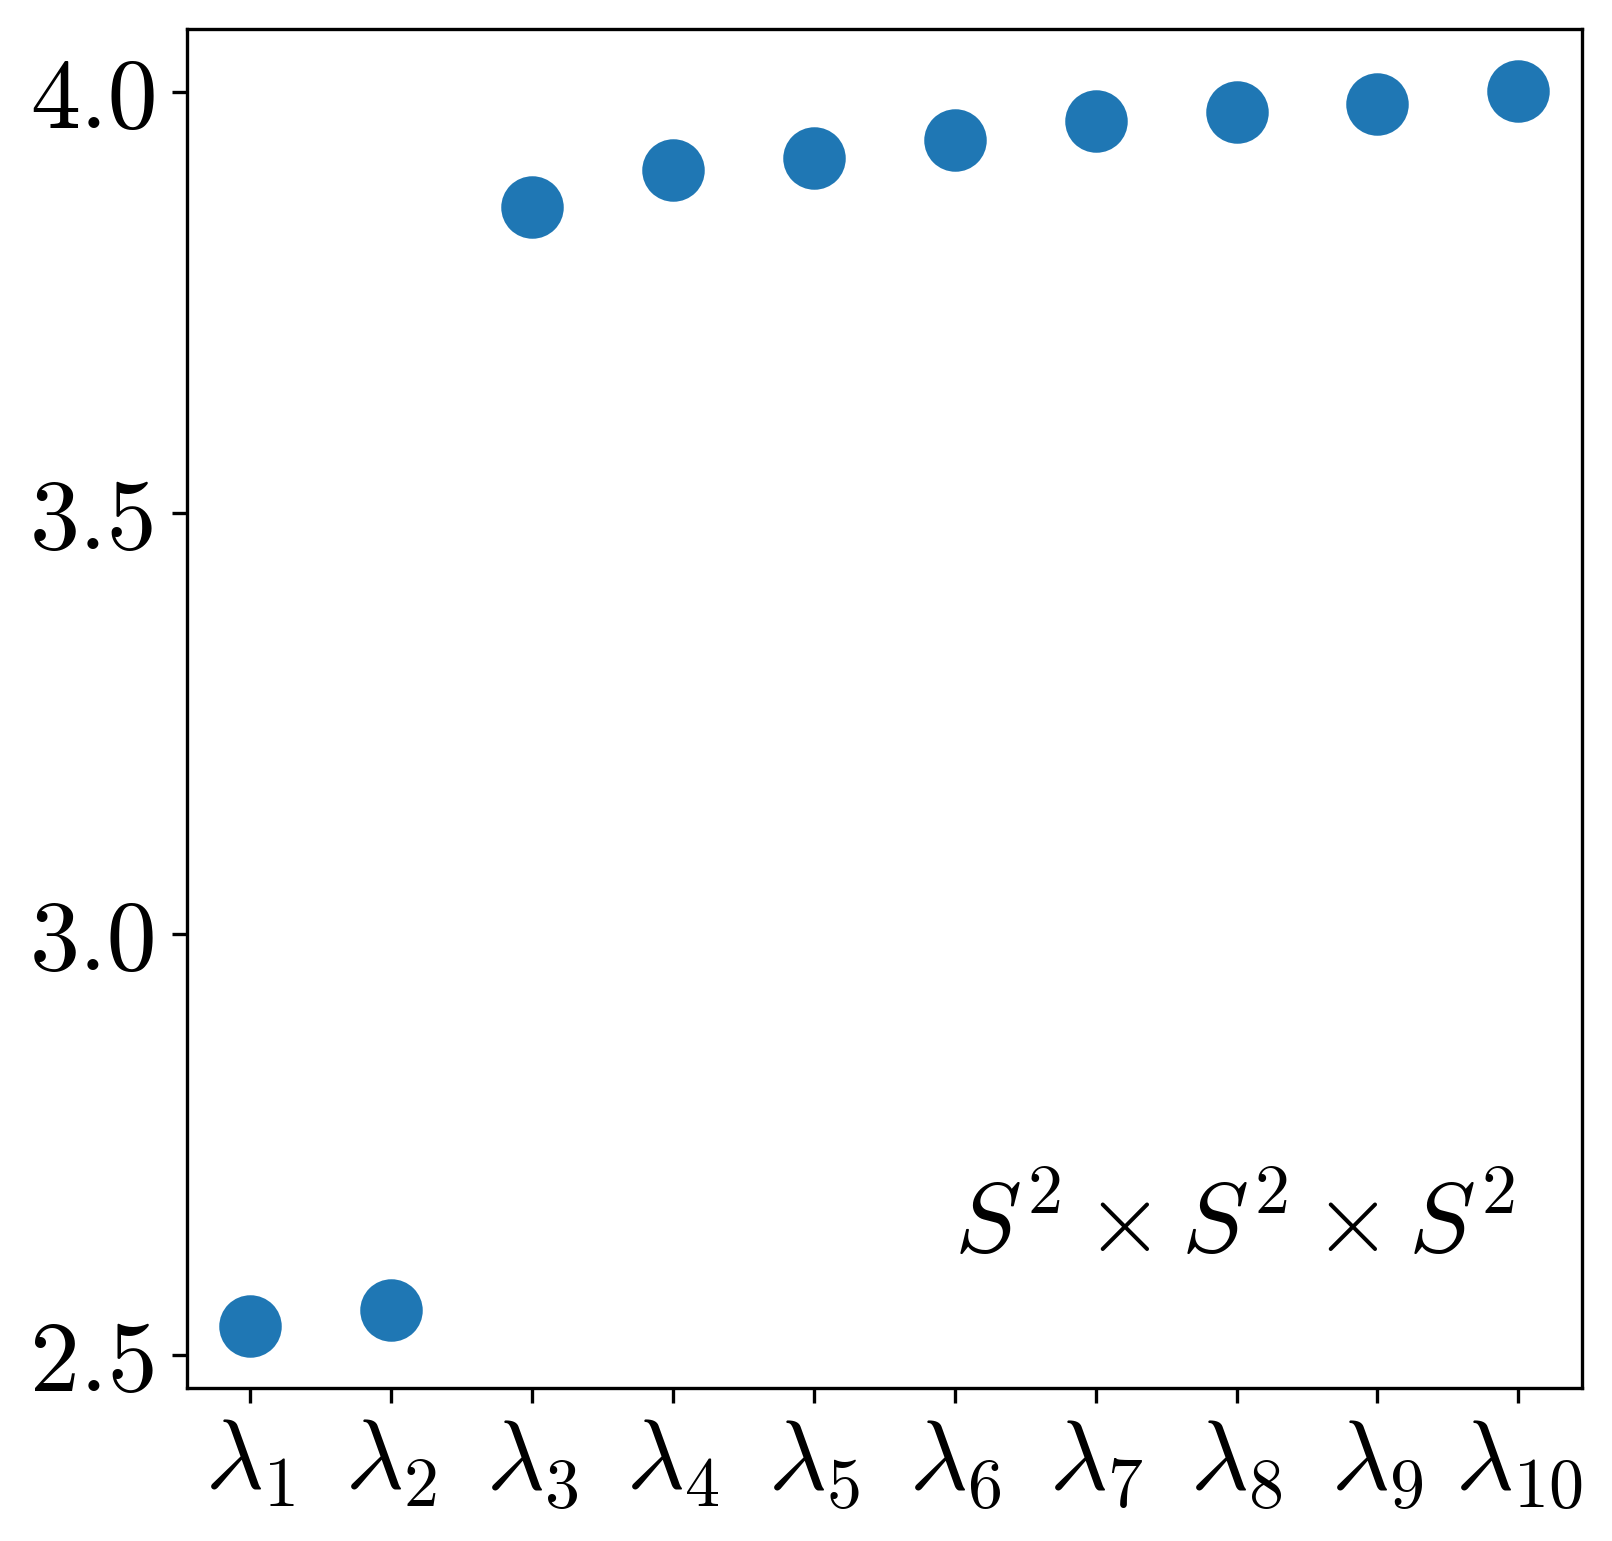

In [69]:
fig, ax = plt.subplots()
ax.plot(x, eigvals,marker='o',linestyle='None',markersize=14)
ax.text(0.55,0.1, r"$S^2 \times S^2 \times S^2$", transform=ax.transAxes)
fig.savefig(f'../figures/initial_3d_visualizations/eigvals_S2timesS2timesS2.png')    
fig.savefig(f'../figures/initial_3d_visualizations/eigvals_S2timesS2timesS2.pdf')

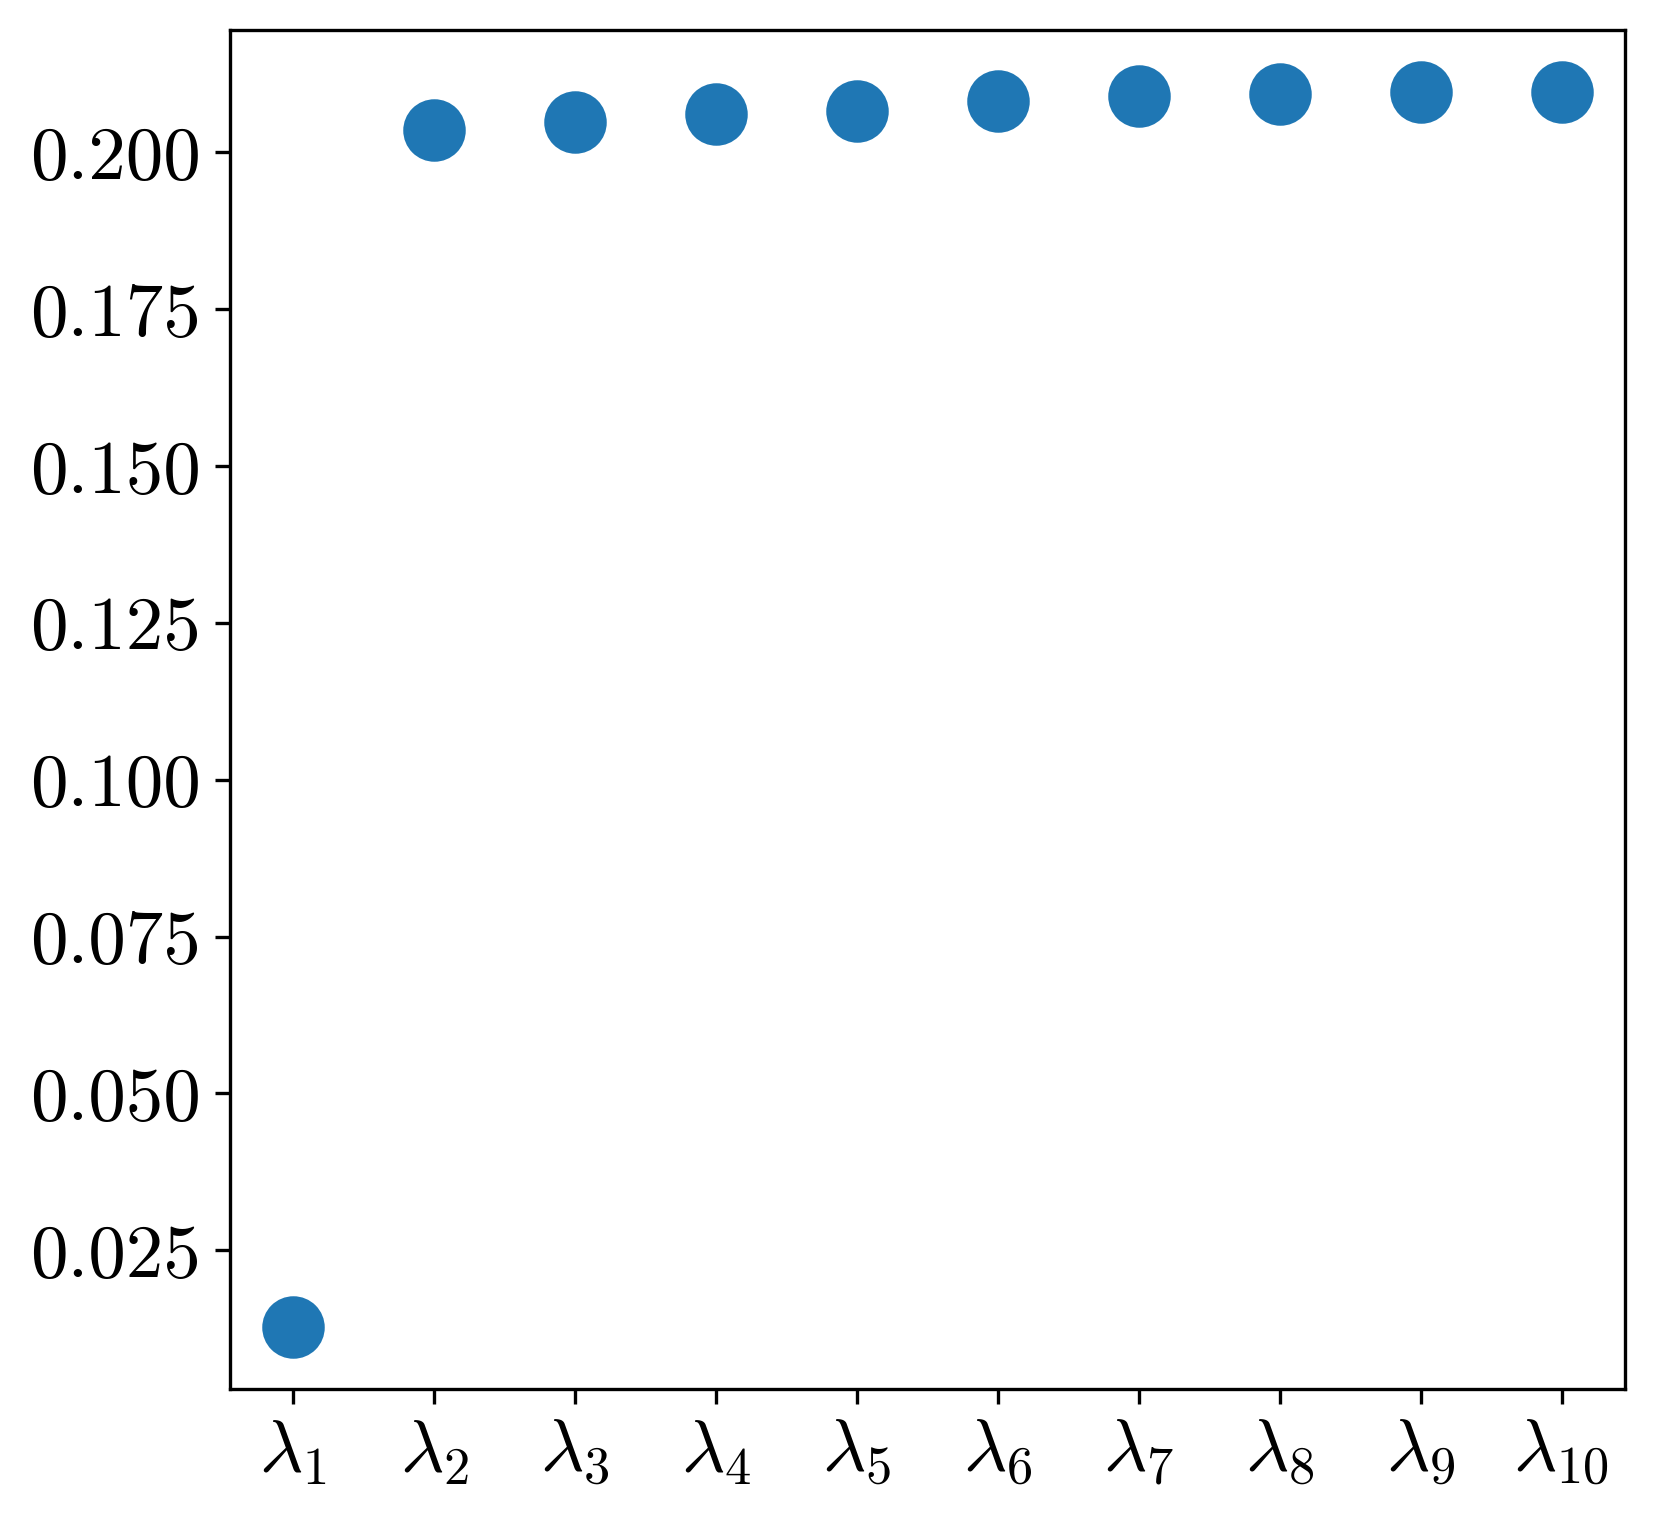

In [86]:
plt.plot(x, eigvals,marker='o',linestyle='None',markersize=14)
plt.savefig(f'../figures/initial_3d_visualizations/eigvals_S2timesS2timesS2.png')    
plt.savefig(f'../figures/initial_3d_visualizations/eigvals_S2timesS2timesS2.pdf')

In [63]:
eigvals

array([0.00931674, 0.00931718, 0.00989124, 0.00989197, 0.01117544,
       0.01117611, 0.01228641, 0.01228695, 0.01278508, 0.01278613],
      dtype=float32)

In [11]:
s2_graph = make_nearest_neighbors_graph(data_s2, 4, n=npoints)

100%|██████████| 10000/10000 [00:00<00:00, 24013.98it/s]


In [12]:
s2_graph

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 48468 stored elements in List of Lists format>

In [13]:
s2_tangents = make_tangents(data_s2, s2_graph, 2)

100%|██████████| 10000/10000 [00:00<00:00, 20483.02it/s]


In [14]:
s2_tangents.shape

(10000, 2, 3)

In [15]:
firstbasis = np.zeros((npoints, 6))
secondbasis = np.zeros((npoints, 6))

In [16]:
origins = data_s2

In [53]:
firstbasis[:,:3] = origins
firstbasis[:,3:] = s2_tangents[:,0,:]/7

In [54]:
secondbasis[:,:3] = origins
secondbasis[:,3:] = s2_tangents[:,1,:]/7

In [55]:
X, Y, Z, U, V, W = zip(*firstbasis[:100])

In [56]:
X2, Y2, Z2, U2, V2, W2= zip(*secondbasis[:100])

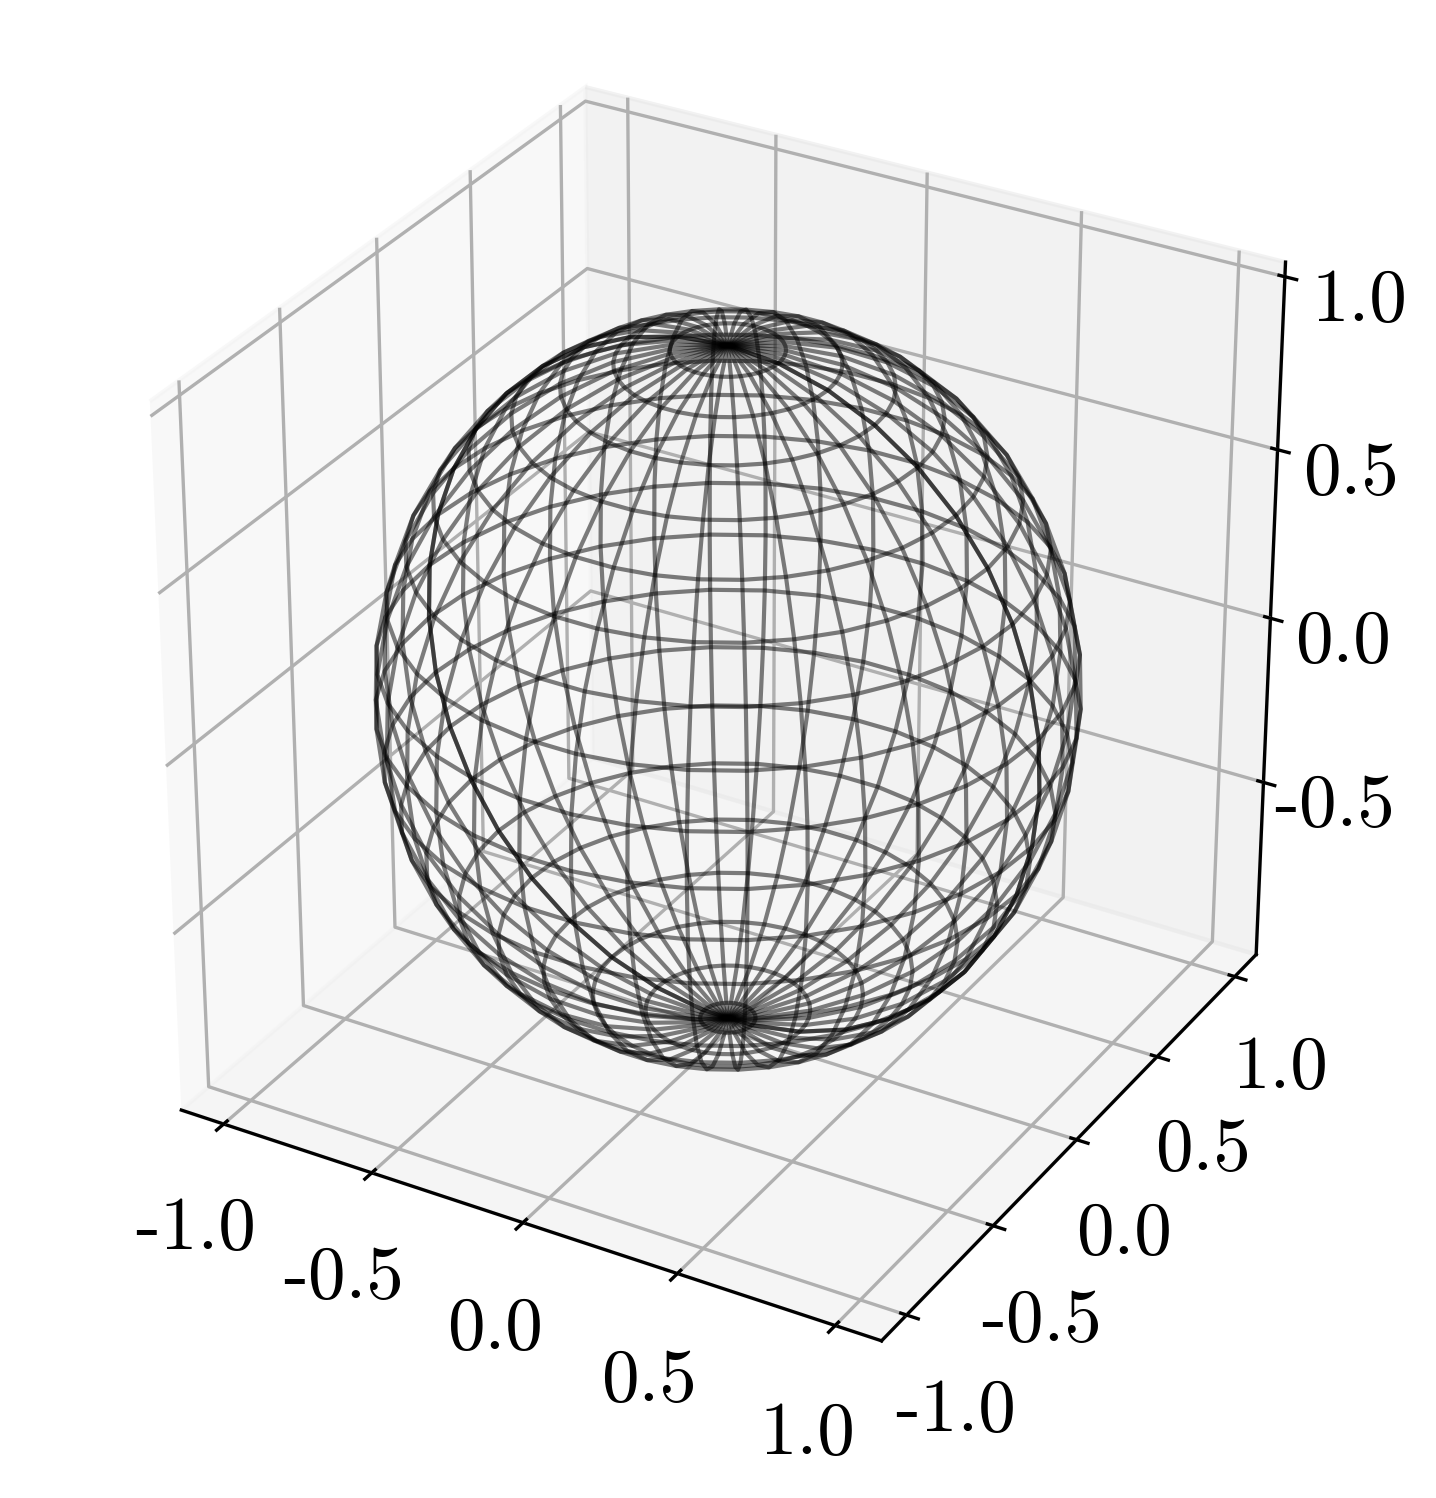

In [57]:
fig, ax = visualize_grid_sphere()

In [58]:
ax.scatter(data_s2[:100, 0], data_s2[:100,1], data_s2[:100,2], s=3, c='r', zorder=10)

In [59]:
ax.quiver(X, Y, Z, U, V, W, color="C0")

In [60]:
ax.quiver(X2, Y2, Z2, U2, V2, W2, color="C1")

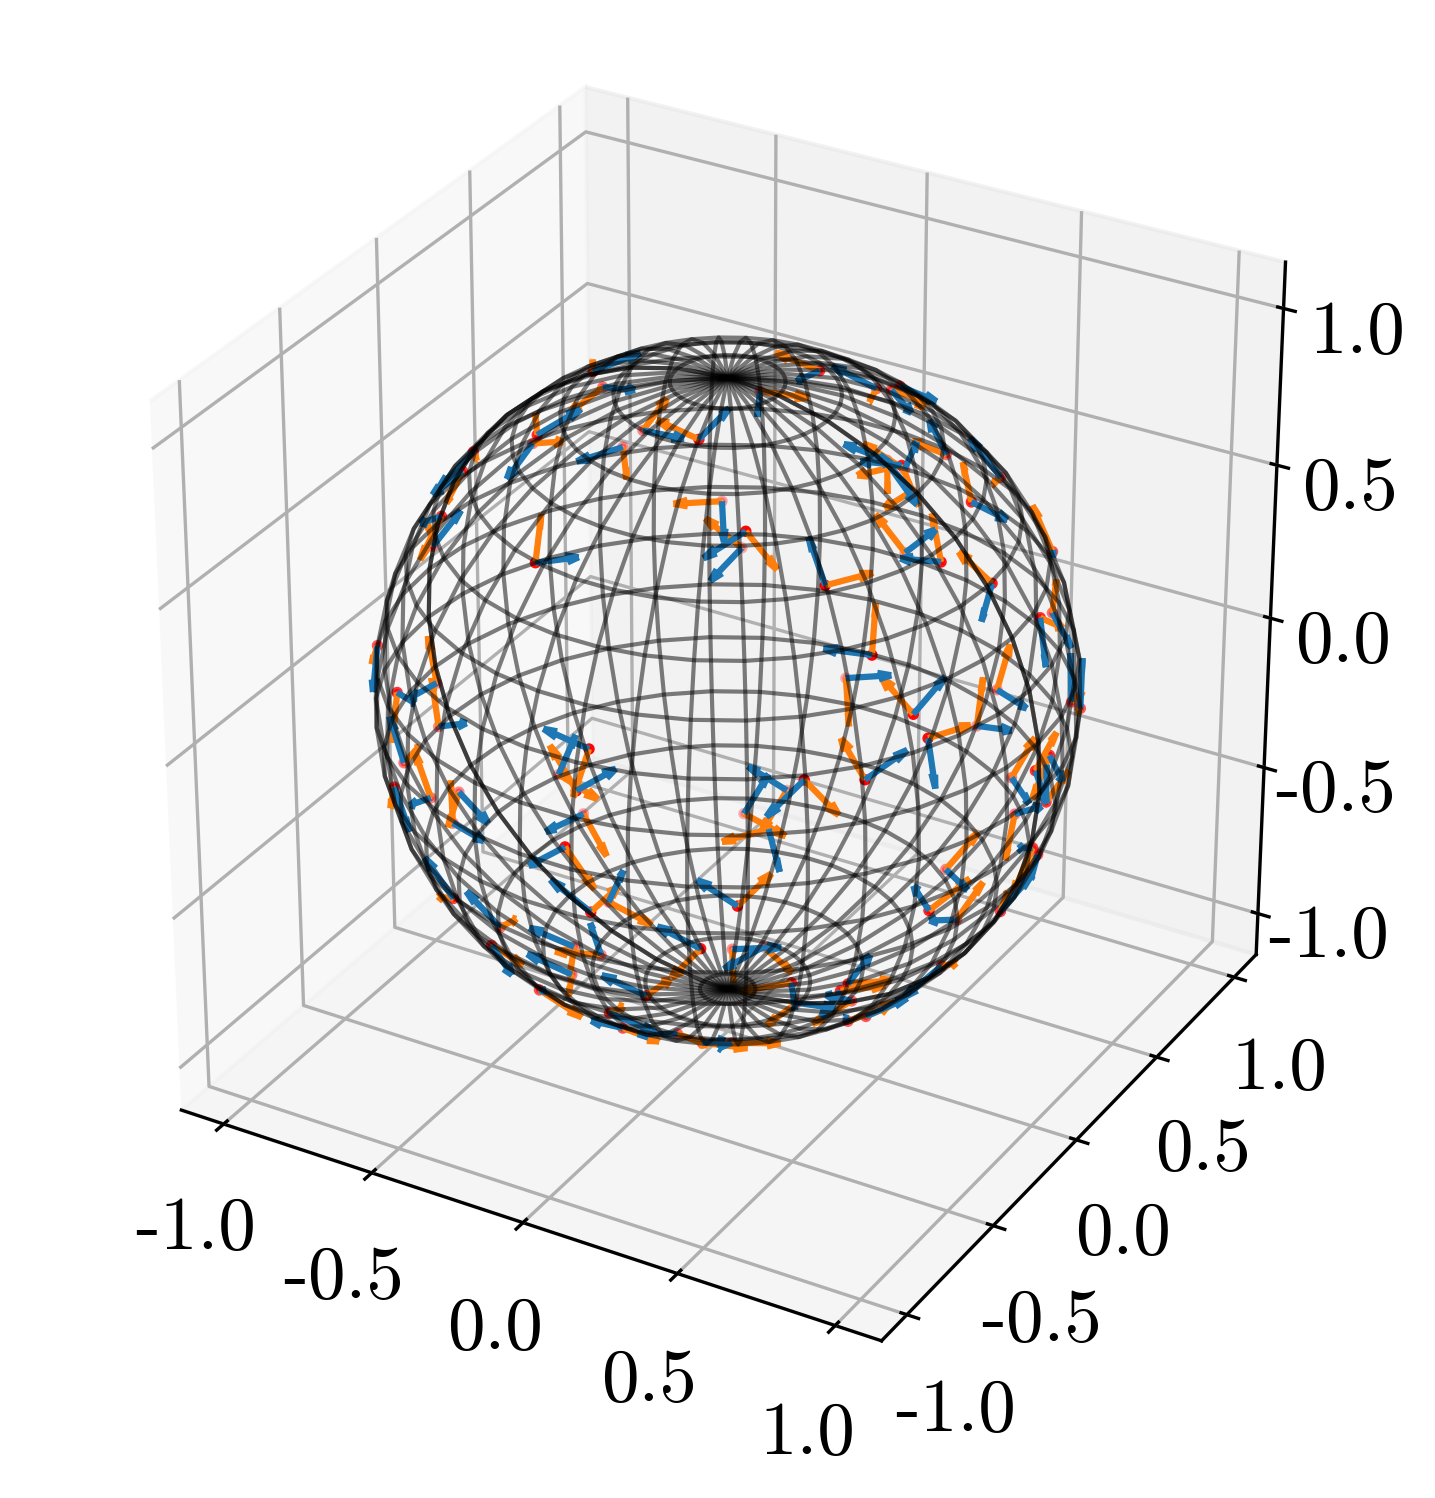

In [61]:
fig

In [62]:
fig.savefig(f'../figures/initial_3d_visualizations/tangents_visualization_S2.png')    
fig.savefig(f'../figures/initial_3d_visualizations/tangents_visualization_S2.pdf')

In [20]:
ax.scatter(data_s2[0,:], data_s2[1,:], data_s2[2,:], s=3, c='r', zorder=10)

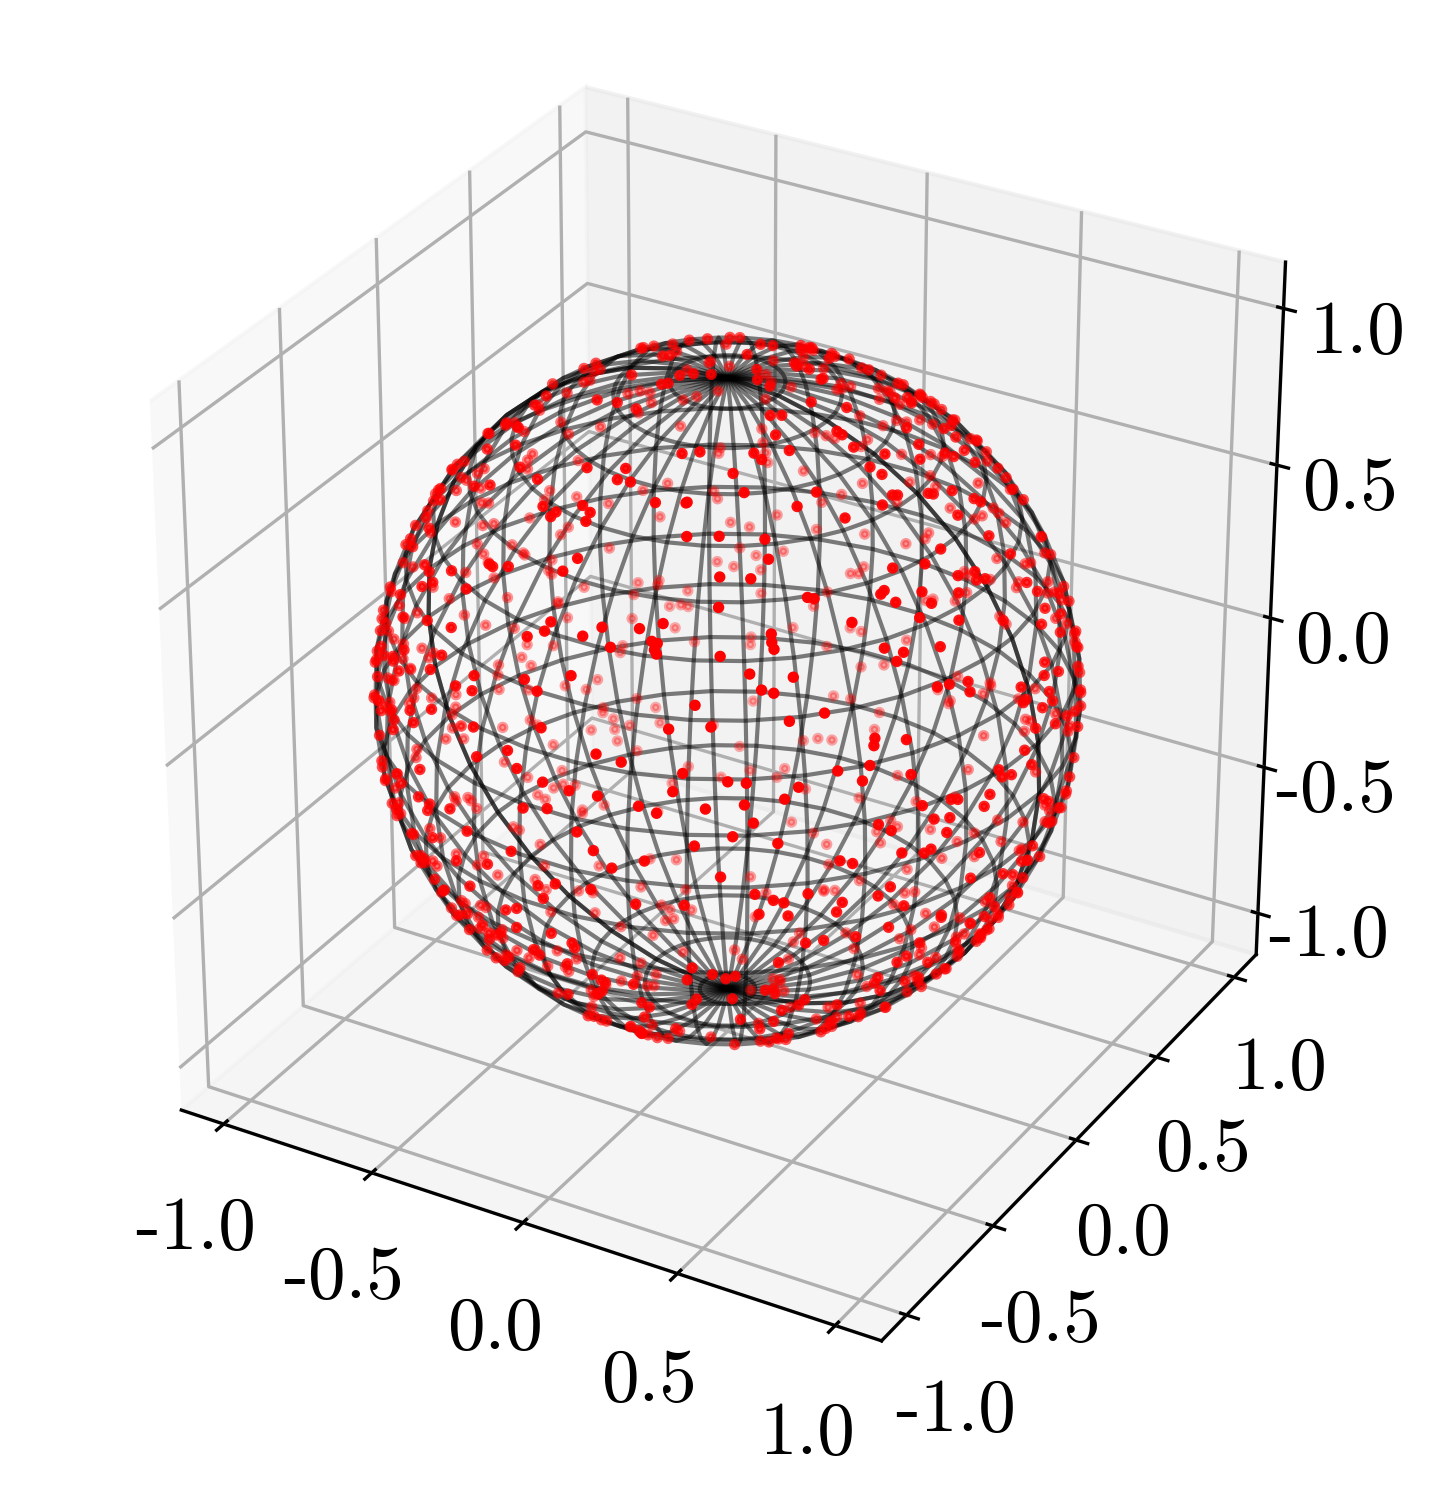

In [21]:
fig

In [22]:
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_S2.png')    
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_S2.pdf')

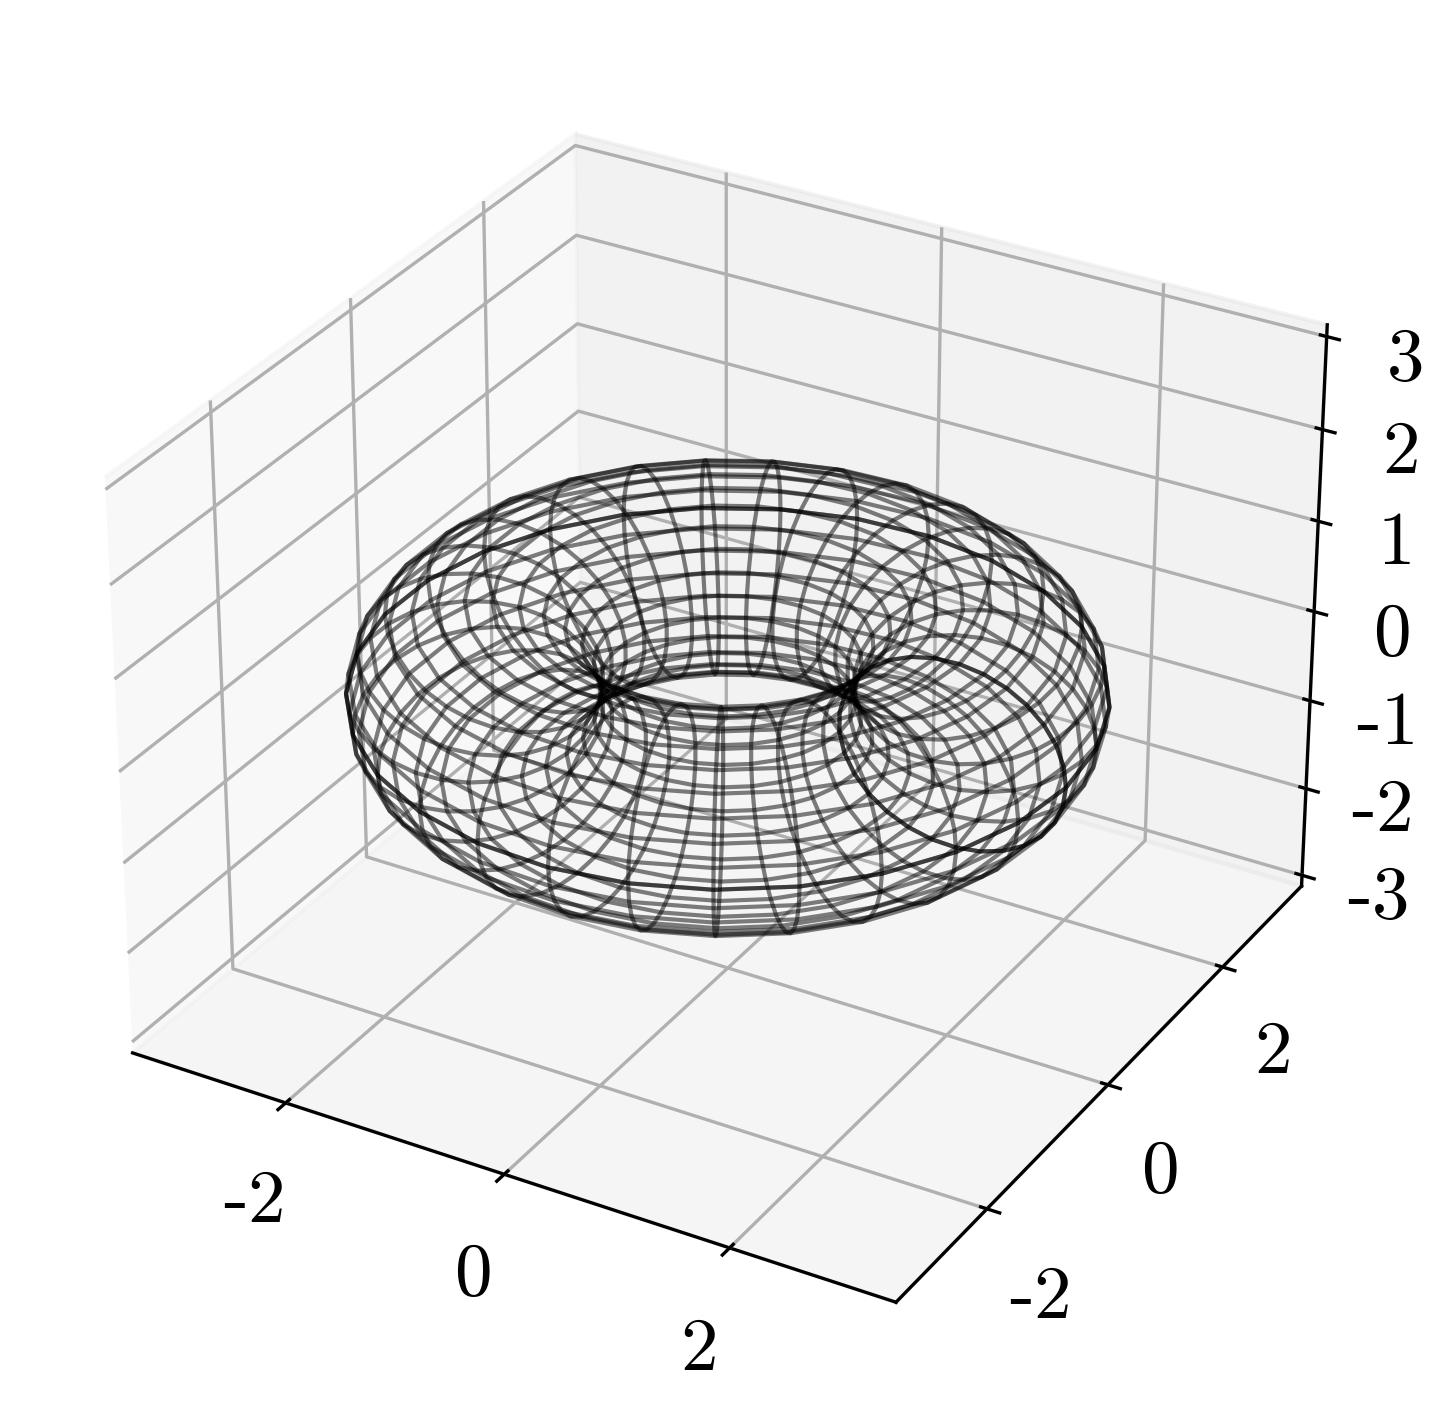

In [24]:
fig, ax = visualize_grid_torus(30,2,1)

In [25]:
ax.scatter(data_t[0,:], data_t[1,:], data_t[2,:], s=3, c='r', zorder=10)

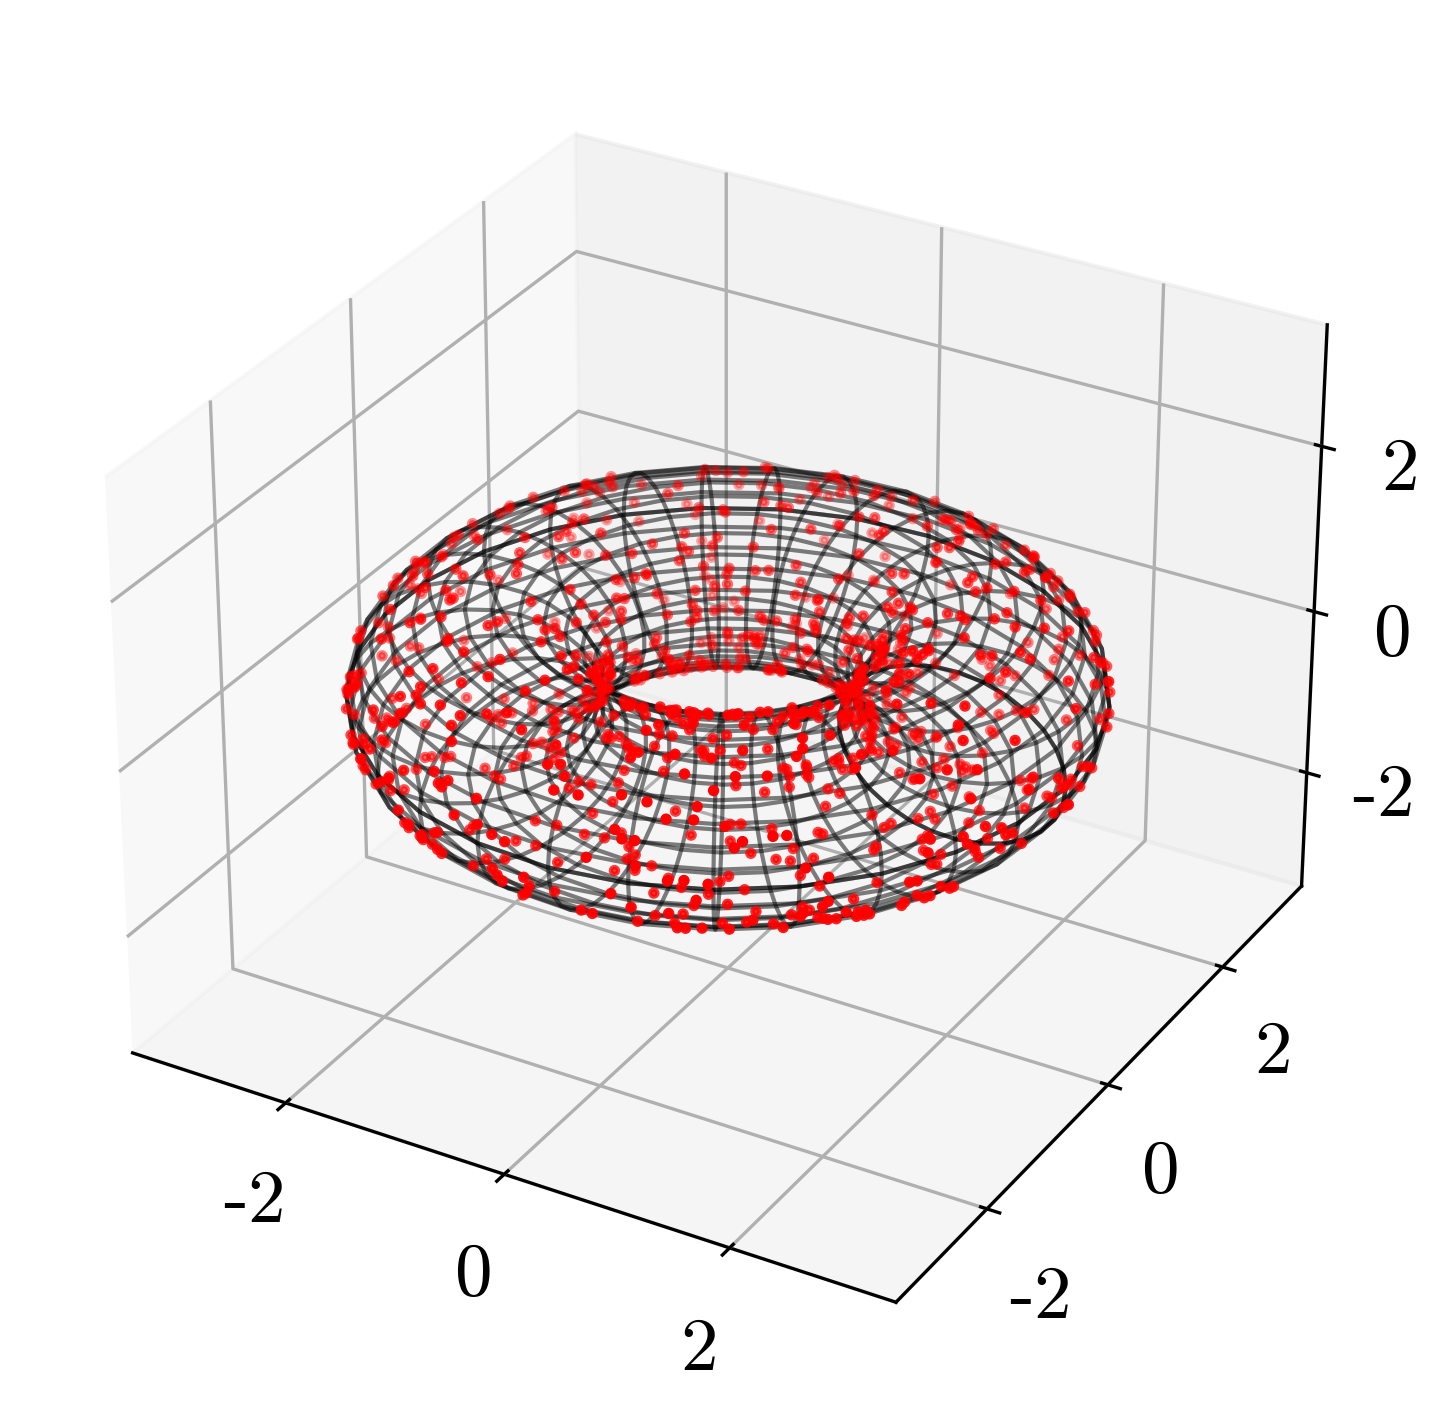

In [26]:
fig

In [27]:
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_T.png')    
fig.savefig(f'../figures/initial_3d_visualizations/datapoints_visualization_T.pdf')

In [ ]:
phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(100)

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1)
ax.scatter(xi, yi, zi, s=100, c='r', zorder=10)